In [1]:
import numpy as np
import pandas as pd
import re
import os
import math
import joblib
import warnings
import time
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, Normalizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, SpectralClustering, Birch
from sklearn.decomposition import PCA
from scipy.linalg import solveh_banded  # para hacer ALS
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import argrelextrema
from itertools import product
from scipy.signal import savgol_filter
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, Normalizer
from scipy.linalg import solveh_banded  # para hacer ALS
from scipy import sparse
from scipy.sparse.linalg import spsolve
from scipy.signal import argrelextrema
from itertools import product
from scipy.signal import savgol_filter
from functools import reduce
from sklearn.metrics import mean_squared_error as mse

In [2]:
rutaUAM588_luer = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\unseens\\filtradoUAM588'
UAM588_luer, desplazamientos_UAM588_luer = procesar_carpeta_principal(rutaUAM588_luer, n)

rutaUAM588_CAMARA = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\unseens\\Camara\\UAM588'
UAM588_CAMARA, desplazamientos_rutaUAM588_CAMARA = procesar_carpeta_principal(rutaUAM588_CAMARA, n)

rutaUAM588_MC_CAMARA = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\unseens\\Camara\\UAM588_MedioCambiado'
UAM588_MC_CAMARA, desplazamientos_rutaUAM588_MC_CAMARA = procesar_carpeta_principal(rutaUAM588_MC_CAMARA, n)


rutaUAM502_luer = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\unseens\\filtradoUAM502'
UAM502_luer, desplazamientos_rutaUAM502_luer = procesar_carpeta_principal(rutaUAM502_luer, n)

rutaUAM502_CAMARA = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\unseens\\Camara\\UAM502_neubauer'
UAM502_CAMARA, desplazamientos_rutaUAM502_CAMARA = procesar_carpeta_principal(rutaUAM502_CAMARA, n)

rutaUAM502_MC_CAMARA = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\unseens\\Camara\\UAM502_MedioCambiado'
UAM502_MC_CAMARA, desplazamientos_rutaUAM502_MC_CAMARA = procesar_carpeta_principal(rutaUAM502_MC_CAMARA, n)



NameError: name 'user' is not defined

In [ ]:
UAM588_MC_CAMARA['medium'] = 'BG11'
UAM588_MC_CAMARA['especie'] = 'UAM588_MC_neubauer'

UAM588_CAMARA['medium'] = 'BG110'
UAM588_CAMARA['especie'] = 'UAM588_neubauer'

UAM588_luer['medium'] = 'BG110'
UAM588_luer['especie'] = 'UAM588_luer'

UAM502_luer['medium'] = 'BG110'
UAM502_luer['especie'] = 'UAM502_luer'


UAM502_MC_CAMARA['medium'] = 'BG11'
UAM502_MC_CAMARA['especie'] = 'UAM502_MC_neubauer'

UAM502_CAMARA['medium'] = 'BG110'
UAM502_CAMARA['especie'] = 'UAM502_neubauer'

# Concatenar los DataFrames
df_concatenado = pd.concat([UAM588_CAMARA, UAM588_MC_CAMARA, UAM502_CAMARA, UAM502_MC_CAMARA, UAM502_luer, UAM588_luer], ignore_index=True)



ruta_guardado = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\ciano_neubauer_V091024.csv'
df_concatenado.to_csv(ruta_guardado, index=False)
df_concatenado['especie'].value_counts()

especie
UAM502_luer           1459
UAM502_neubauer       1453
UAM588_luer           1441
UAM502_MC_neubauer    1435
UAM588_neubauer       1423
UAM588_MC_neubauer    1266
Name: count, dtype: int64

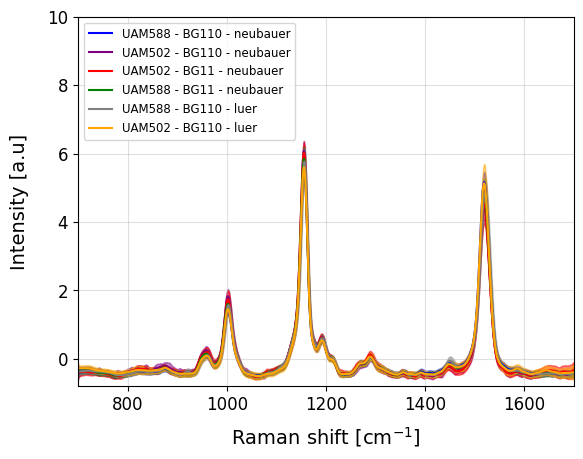

In [175]:
df_UAM588_MC_CAMARA = UAM588_MC_CAMARA.iloc[:,:-5].mean(axis=0)
std_UAM588_MC_CAMARA = UAM588_MC_CAMARA.iloc[:,:-5].std(axis=0)

df_UAM588_CAMARA = UAM588_CAMARA.iloc[:,:-5].mean(axis=0)
std_UAM588_CAMARA = UAM588_CAMARA.iloc[:,:-5].std(axis=0)

df_UAM588_luer = UAM588_luer.iloc[:,:-5].mean(axis=0)
std_UAM588_luer = UAM588_luer.iloc[:,:-5].std(axis=0)

df_UAM502_luer = UAM502_luer.iloc[:,:-5].mean(axis=0)
std_UAM502_luer = UAM502_luer.iloc[:,:-5].std(axis=0)

df_UAM502_CAMARA = UAM502_CAMARA.iloc[:,:-5].mean(axis=0)
std_UAM502_CAMARA = UAM502_CAMARA.iloc[:,:-5].std(axis=0)

df_UAM502_MC_CAMARA = UAM502_MC_CAMARA.iloc[:,:-5].mean(axis=0)
std_UAM502_MC_CAMARA = UAM502_MC_CAMARA.iloc[:,:-5].std(axis=0)


x = np.arange(700, 1700, 1)
plt.plot(x, df_UAM588_CAMARA, label='UAM588 - BG110 - neubauer', color='blue')
plt.fill_between(x, df_UAM588_CAMARA - std_UAM588_CAMARA, df_UAM588_CAMARA + std_UAM588_CAMARA, color='blue', alpha=0.5)
plt.plot(x, df_UAM502_CAMARA, label='UAM502 - BG110 - neubauer', color='purple')
plt.fill_between(x, df_UAM502_CAMARA - std_UAM502_CAMARA, df_UAM502_CAMARA + std_UAM502_CAMARA, color='purple', alpha=0.5)
plt.plot(x, df_UAM502_MC_CAMARA, label='UAM502 - BG11 - neubauer', color='red')
plt.fill_between(x, df_UAM502_MC_CAMARA - std_UAM502_MC_CAMARA, df_UAM502_MC_CAMARA + std_UAM502_MC_CAMARA, color='red', alpha=0.5)
plt.plot(x, df_UAM588_MC_CAMARA, label='UAM588 - BG11 - neubauer', color='green')
plt.fill_between(x, df_UAM588_MC_CAMARA - std_UAM588_MC_CAMARA, df_UAM588_MC_CAMARA + std_UAM588_MC_CAMARA, color='green', alpha=0.5)
plt.plot(x, df_UAM588_luer, label='UAM588 - BG110 - luer', color='grey')
plt.fill_between(x, df_UAM588_luer - std_UAM588_luer, df_UAM588_luer + std_UAM588_luer, color='grey', alpha=0.5)
plt.plot(x, df_UAM502_luer, label='UAM502 - BG110 - luer', color='orange')
plt.fill_between(x, df_UAM502_luer - std_UAM502_luer, df_UAM502_luer + std_UAM502_luer, color='orange', alpha=0.5)
plt.legend(loc = 'upper left', fontsize=8.5)
plt.xlabel('Raman shift [cm$^{-1}$]', fontsize=14, labelpad=8)
plt.ylabel('Intensity [a.u]', fontsize=14, labelpad=13)
plt.xlim(700, 1700)
plt.ylim(-0.8, 10)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.4)
plt.show()

In [2]:
df = pd.read_csv('C:\\Users\\fmantecam\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\ciano_neubauer_V091024.csv')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

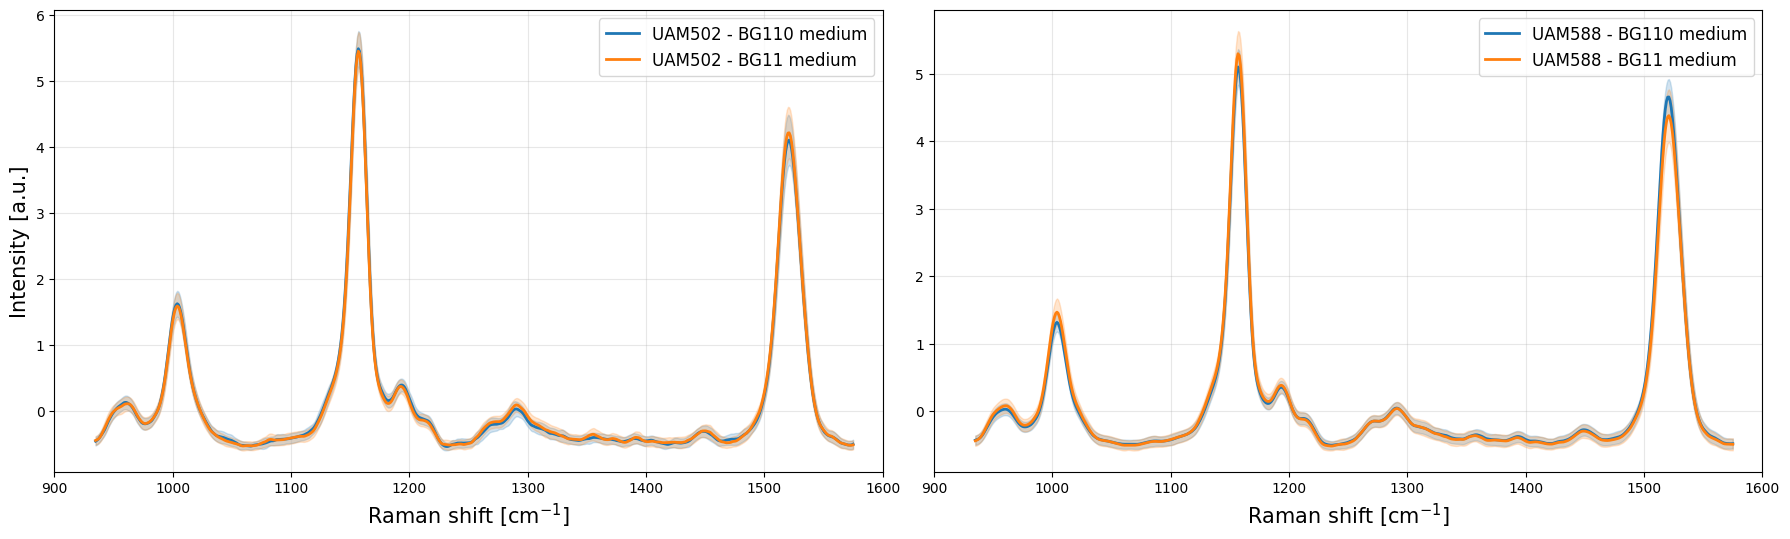

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Cargar el archivo CSV
df = pd.read_csv('C:\\Users\\fmantecam\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\ciano_neubauer_V091024.csv')

# Definir los rangos de Raman Shifts
raman_shifts = np.arange(935, 1576, 1)

# Eliminar las columnas irrelevantes
columns_to_drop = ['name', 't_exp', 'date', 'medium', 'especie']
df_numeric = df.drop(columns=columns_to_drop, errors='ignore')

# Filtrar las especies y medios de cultivo
uam502_bg110 = df[df['especie'] == 'UAM502_neubauer'].drop(columns=columns_to_drop, errors='ignore')
uam502_bg11 = df[df['especie'] == 'UAM502_MC_neubauer'].drop(columns=columns_to_drop, errors='ignore')
uam588_bg110 = df[df['especie'] == 'UAM588_neubauer'].drop(columns=columns_to_drop, errors='ignore')
uam588_bg11 = df[df['especie'] == 'UAM588_MC_neubauer'].drop(columns=columns_to_drop, errors='ignore')

# Calcular los promedios y desviaciones estándar
mean_uam502_bg110 = uam502_bg110.mean()
std_uam502_bg110 = uam502_bg110.std()

mean_uam502_bg11 = uam502_bg11.mean()
std_uam502_bg11 = uam502_bg11.std()

mean_uam588_bg110 = uam588_bg110.mean()
std_uam588_bg110 = uam588_bg110.std()

mean_uam588_bg11 = uam588_bg11.mean()
std_uam588_bg11 = uam588_bg11.std()

# Crear la figura
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 5.5))

# Subplot 1: UAM502
ax1.plot(raman_shifts, mean_uam502_bg110, label='UAM502 - BG110 medium', color='C0', lw=2)
ax1.fill_between(raman_shifts, mean_uam502_bg110 - std_uam502_bg110, mean_uam502_bg110 + std_uam502_bg110,
                 color='C0', alpha=0.2)
ax1.plot(raman_shifts, mean_uam502_bg11, label='UAM502 - BG11 medium', color='C1', lw=2)
ax1.fill_between(raman_shifts, mean_uam502_bg11 - std_uam502_bg11, mean_uam502_bg11 + std_uam502_bg11,
                 color='C1', alpha=0.2)
ax1.set_xlabel('Raman shift [cm$^{-1}$]', fontsize=15)
ax1.set_ylabel('Intensity [a.u.]', fontsize=15)
ax1.legend(fontsize=12)
ax1.grid(alpha=0.3)
ax1.set_xlim(900, 1600)

# Subplot 2: UAM588
ax2.plot(raman_shifts, mean_uam588_bg110, label='UAM588 - BG110 medium', color='C0', lw=2)
ax2.fill_between(raman_shifts, mean_uam588_bg110 - std_uam588_bg110, mean_uam588_bg110 + std_uam588_bg110,
                 color='C0', alpha=0.2)
ax2.plot(raman_shifts, mean_uam588_bg11, label='UAM588 - BG11 medium', color='C1', lw=2)
ax2.fill_between(raman_shifts, mean_uam588_bg11 - std_uam588_bg11, mean_uam588_bg11 + std_uam588_bg11,
                 color='C1', alpha=0.2)
ax2.set_xlabel('Raman shift [cm$^{-1}$]', fontsize=15)
ax2.legend(fontsize=12)
ax2.grid(alpha=0.3)
ax2.set_xlim(900, 1600)

# Ajustar el diseño y mostrar
plt.tight_layout()
#plt.savefig('figure_meanspectra_cambiomedio.svg', format='svg', bbox_inches='tight')
plt.show()



Procesando LDA para: Corrected Dataset


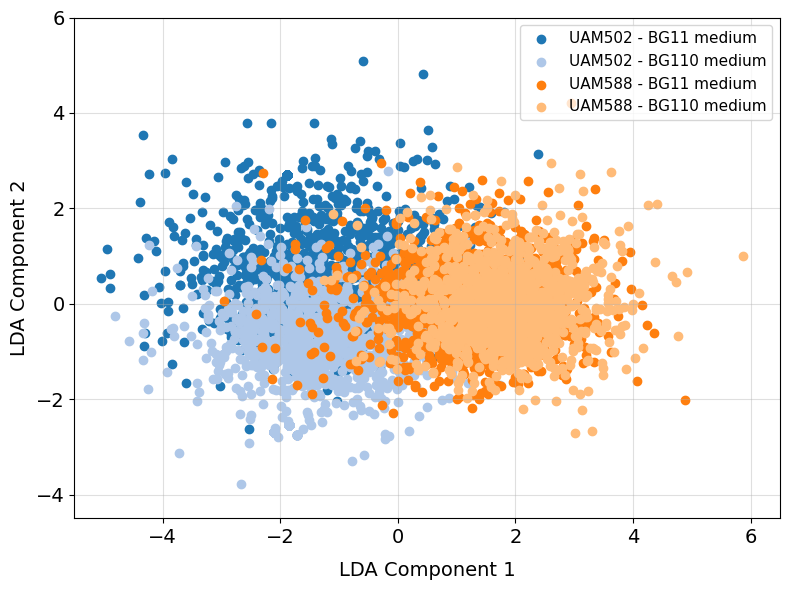

In [4]:

def process_and_plot_single_lda(dataset, file_name, ordered_classes=None, label='especie', custom_labels=None):
    """
    This function applies LDA to a single dataset and plots the result with customizable labels.
    
    Args:
        dataset (DataFrame): The dataset to process.
        file_name (str): The file name for the dataset.
        ordered_classes (list of str): The desired order of classes for label encoding (optional).
        label (str): The name of the column containing the labels (default is 'especie').
        custom_labels (dict): A dictionary to map original class labels to custom labels (optional).
    
    Returns:
        None
    """
    # Definir el colormap usando tab20 de Matplotlib
    colormap = plt.cm.tab20
    colors = colormap.colors  # Extraer la lista de colores del colormap

    print(f"Procesando LDA para: {file_name}")

    dataset = dataset[dataset[label] != 'UAM502_luer']
    dataset = dataset[dataset[label] != 'UAM588_luer']

    # Comprobar si la columna de etiquetas existe en el dataset
    if label not in dataset.columns:
        print(f"Advertencia: '{label}' no encontrado en {file_name}")
        return

    # Obtener las etiquetas
    y = dataset[label].values
    unique_classes_in_dataset = np.unique(y)

    # Comprobar si las clases del dataset coinciden con ordered_classes
    if ordered_classes and set(unique_classes_in_dataset).issubset(set(ordered_classes)):
        # Usar ordered_classes si coinciden
        le = LabelEncoder()
        le.classes_ = np.array(ordered_classes)
        y_encoded = le.transform(y)
    else:
        # Omitir ordered_classes y usar clases propias del dataset
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)

    # Eliminar columnas irrelevantes que no deben usarse para el LDA
    columns_to_drop = ['X', 'Y', 'name', 't_exp', 'date', 'medium', 'especie']
    columns_to_drop = [col for col in columns_to_drop if col in dataset.columns]  # Verificar si las columnas existen
    X = dataset.drop(columns=columns_to_drop, axis=1)

    # Filtrar las columnas numéricas
    X = X.select_dtypes(include=[np.number])

    # Verificar si hay suficientes características numéricas
    if X.shape[1] < 2:
        print(f"Advertencia: No hay suficientes características numéricas en {file_name} para realizar LDA.")
        return

    # Verificar el número de clases
    n_classes = len(np.unique(y_encoded))
    n_features = X.shape[1]
    max_components = min(n_features, n_classes - 1)

    if max_components < 2:
        print(f"Advertencia: No se pueden calcular 2 componentes LDA para {file_name}. Solo se pueden calcular {max_components} componente(s).")
        return

    # Aplicar LDA con dos componentes
    lda = LinearDiscriminantAnalysis(n_components=2)
    X_lda = lda.fit_transform(X, y_encoded)

    # Crear la gráfica
    plt.figure(figsize=(8, 6))
    unique_labels = np.unique(y_encoded)
    for j, label_value in enumerate(unique_labels):
        # Obtener etiqueta personalizada si se especifica
        actual_label = le.inverse_transform([label_value])[0]
        if custom_labels and actual_label in custom_labels:
            actual_label = custom_labels[actual_label]

        X_label = X_lda[y_encoded == label_value]
        plt.scatter(X_label[:, 0], X_label[:, 1], label=actual_label, color=colors[j % len(colors)])

    # Configuración del gráfico
    plt.xlabel('LDA Component 1', fontsize=14, labelpad=10)
    plt.ylabel('LDA Component 2', fontsize=14, labelpad=5)
    plt.tick_params(axis='both', which='major', labelsize=14)
    plt.legend(loc='upper right', fontsize=11)
    plt.ylim(-4.5, 6)
    plt.xlim(-5.5, 6.5)
    plt.grid(alpha=0.4)
    plt.tight_layout()
    #plt.savefig('C:\\Users\\fmantecam\\OneDrive - UNICAN\\Figuraspapercianos\\figure_LDA_cambiomedio_V2.svg', format='svg', bbox_inches='tight')
    plt.show()



custom_labels = {
    'UAM502_MC_neubauer': 'UAM502 - BG11 medium',
    'UAM502_neubauer': 'UAM502 - BG110 medium',
    'UAM588_MC_neubauer': 'UAM588 - BG11 medium',
    'UAM588_neubauer': 'UAM588 - BG110 medium'
}

process_and_plot_single_lda(df, "Corrected Dataset", ordered_classes=['UAM502_MC_neubauer', 'UAM502_neubauer', 'UAM588_MC_neubauer', 'UAM588_neubauer'], custom_labels=custom_labels)

Cargando modelo desde C:\Users\fmantecam\OneDrive - UNICAN\Figuraspapercianos\cnn_model_cnn_model_mediocultivo3.h5...
Preprocesando datos...
Generando predicciones...
175/175 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Generando matriz de confusión...
Matriz de confusión guardada como C:\Users\fmantecam\OneDrive - UNICAN\Figuraspapercianos\cm_3channels.svg y C:\Users\fmantecam\OneDrive - UNICAN\Figuraspapercianos\cm_3channels.png


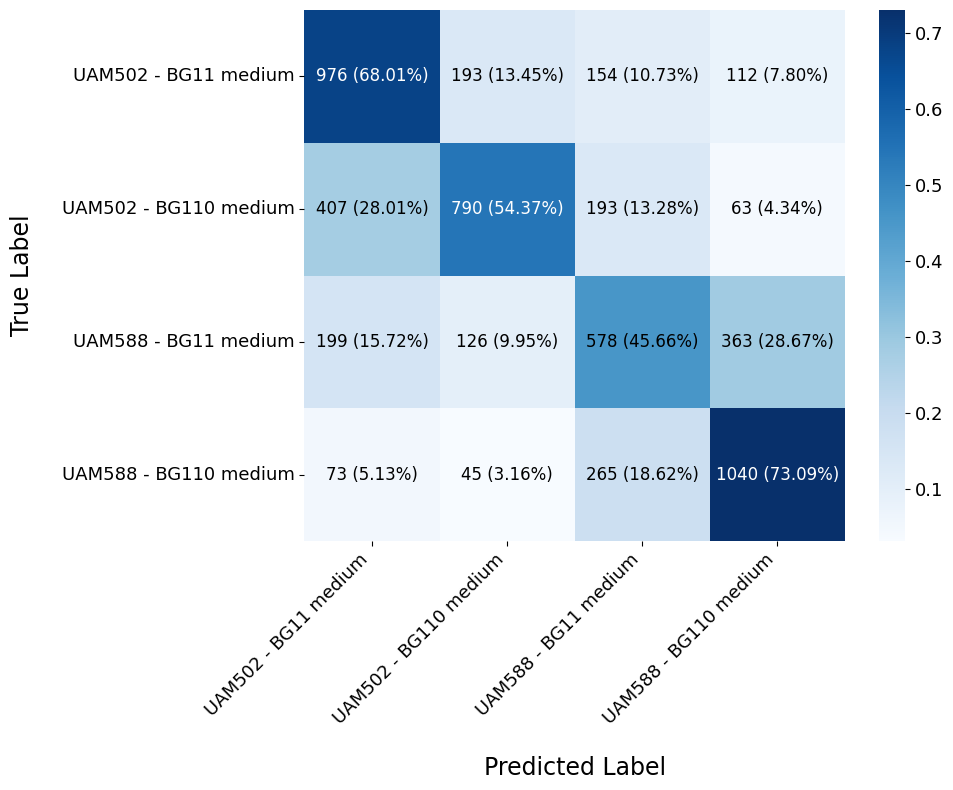

In [9]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def load_and_evaluate_model(model_path, df, label_column, custom_labels, save_path):
    """
    Loads a trained model, evaluates it on the provided dataset, and plots a confusion matrix.

    Args:
        model_path (str): Path to the trained model (.h5 format).
        df (DataFrame): Dataset containing features and labels.
        label_column (str): Column name for the labels in the dataset.
        custom_labels (dict): Dictionary mapping encoded labels to custom labels.
        save_path (str): Path to save the confusion matrix figures.

    Returns:
        None
    """
    # Cargar el modelo
    print(f"Cargando modelo desde {model_path}...")
    model = tf.keras.models.load_model(model_path)

    # Preprocesar el dataset
    print("Preprocesando datos...")
    df = df[(df[label_column] != 'UAM502_luer') & (df[label_column] != 'UAM588_luer')]
    labels = df[label_column].values

    # Codificar etiquetas
    le = LabelEncoder()
    le.fit(labels)  # Ajustar el codificador a las etiquetas del dataset
    y_encoded = le.transform(labels)

    # Crear el mapeo para etiquetas personalizadas
    custom_label_map = {i: custom_labels.get(cls, cls) for i, cls in enumerate(le.classes_)}

    # Convertir etiquetas a una codificación one-hot
    num_classes = len(le.classes_)
    y_onehot = tf.keras.utils.to_categorical(y_encoded, num_classes=num_classes)

    # Extraer características
    X = df.drop(columns=['X', 'Y', 'name', 't_exp', 'date', 'medium', label_column], errors='ignore').to_numpy()
    X = X.reshape(X.shape[0], X.shape[1], 1)  # Ajustar a la entrada requerida por Conv1D

    # Generar predicciones
    print("Generando predicciones...")
    y_pred = model.predict(X)
    y_pred_int = np.argmax(y_pred, axis=1)
    y_true_int = np.argmax(y_onehot, axis=1)

    # Calcular matriz de confusión
    cm = confusion_matrix(y_true_int, y_pred_int)
    cm_normalized = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    # Graficar la matriz de confusión
    print("Generando matriz de confusión...")
    fig, ax = plt.subplots(figsize=(10, 8))
    sns_heatmap = sns.heatmap(
        cm_normalized, annot=False, fmt='.2%', cmap='Blues',
        xticklabels=[custom_label_map[i] for i in range(num_classes)],
        yticklabels=[custom_label_map[i] for i in range(num_classes)]
    )

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            value = cm[i, j]
            if value != 0 and not np.isnan(cm_normalized[i, j]):
                text = f"{value} ({cm_normalized[i, j] * 100:.2f}%)"
                text_color = "white" if cm_normalized[i, j] > 0.5 else "black"
                plt.annotate(text, (j + 0.5, i + 0.5), ha='center', va='center', color=text_color, fontsize=12)

    ax.set_xlabel('Predicted Label', fontsize=17, labelpad=20)
    ax.set_ylabel('True Label', fontsize=17, labelpad=20)
    plt.xticks(rotation=45, fontsize=13, ha='right')  # Inclinar etiquetas en el eje X
    plt.yticks(fontsize=13)
    cbar = sns_heatmap.collections[0].colorbar
    cbar.ax.tick_params(labelsize=13)
    plt.tight_layout()

    # Guardar la matriz de confusión
    cm_svg = f"{save_path}cm_3channels.svg"
    cm_png = f"{save_path}cm_3channels.png"
    #fig.savefig(cm_svg, format="svg", dpi=300)
    #fig.savefig(cm_png, format="png", dpi=300)
    print(f"Matriz de confusión guardada como {cm_svg} y {cm_png}")
    plt.show()


# Ejemplo de uso
model_path = 'C:\\Users\\fmantecam\\OneDrive - UNICAN\\Figuraspapercianos\\cnn_model_cnn_model_mediocultivo3.h5'
dataset_path = 'C:\\Users\\fmantecam\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\ciano_neubauer_V091024.csv'
save_path = 'C:\\Users\\fmantecam\\OneDrive - UNICAN\\Figuraspapercianos\\'

custom_labels = {
    'UAM502_MC_neubauer': 'UAM502 - BG11 medium',
    'UAM502_neubauer': 'UAM502 - BG110 medium',
    'UAM588_MC_neubauer': 'UAM588 - BG11 medium',
    'UAM588_neubauer': 'UAM588 - BG110 medium'
}

df = pd.read_csv(dataset_path)

load_and_evaluate_model(
    model_path=model_path,
    df=df,
    label_column='especie',
    custom_labels=custom_labels,
    save_path=save_path
)


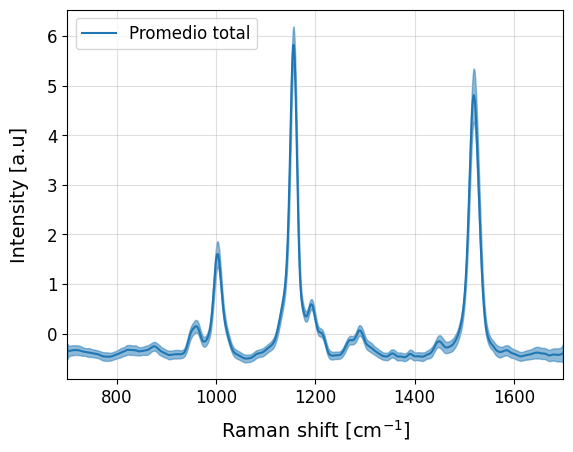

In [180]:
media_df_concatenado = df_concatenado.iloc[:,:-5].mean(axis=0)
std_df_concatenado = df_concatenado.iloc[:,:-5].std(axis=0)



x = np.arange(700, 1700, 1)
plt.plot(x, media_df_concatenado, label='Promedio total', color='C0')
plt.fill_between(x, media_df_concatenado - std_df_concatenado, media_df_concatenado + std_df_concatenado, color='C0', alpha=0.5)
plt.legend(loc = 'upper left', fontsize=12)
plt.xlabel('Raman shift [cm$^{-1}$]', fontsize=14, labelpad=8)
plt.ylabel('Intensity [a.u]', fontsize=14, labelpad=13)
plt.xlim(700, 1700)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, alpha=0.4)
plt.show()

In [ ]:



def ajustar_y_concatenar_baselines(corrected_df, baselines_df):
    """
    Ajusta el primer valor de la línea base para que coincida con el último valor del espectro corregido y
    concatena ambos DataFrames usando las 5 columnas categóricas para la alineación. Luego, normaliza y estandariza
    el DataFrame combinado.

    Parameters:
    corrected_df (pd.DataFrame): DataFrame con los datos corregidos y las últimas 5 columnas categóricas.
    baselines_df (pd.DataFrame): DataFrame con las líneas base correspondientes.

    Returns:
    pd.DataFrame: DataFrame combinado con los datos corregidos, líneas base ajustadas, columnas categóricas y estandarizado.
    """
    # Extraer las últimas 5 columnas categóricas de corrected_df
    categorical_columns = corrected_df.iloc[:, -5:]
    corrected_data = corrected_df.iloc[:, :-5]

    # Extraer las líneas base y las columnas categóricas de baselines_df
    baseline_data = baselines_df.iloc[:, :-5]
    baseline_categorical_data = baselines_df.iloc[:, -5:]

    # Unir los datos corregidos y las líneas base usando las columnas categóricas para asegurar la alineación
    merged_data = pd.merge(
        corrected_data,
        baseline_data,
        left_index=True,
        right_index=True,
        suffixes=('_corr', '_base')
    )

    # Ajustar el primer valor de cada línea base para que coincida con el último valor del espectro corregido
    for index, row in merged_data.iterrows():
        last_value_corrected = row.iloc[len(corrected_data.columns) - 1]  # Último valor del espectro corregido
        baseline_values = row.iloc[len(corrected_data.columns):].values  # Valores de la línea base

        # Ajustar la línea base
        baseline_shift = baseline_values[0]  # Guardar el primer valor de la línea base antes de ajustar
        adjusted_baseline = baseline_values - baseline_shift  # Restar el primer valor a toda la línea base
        adjusted_baseline[0] = last_value_corrected  # Ajustar el primer valor para que coincida con el último corregido

        # Actualizar los valores ajustados en el DataFrame
        merged_data.loc[index, merged_data.columns[len(corrected_data.columns):]] = adjusted_baseline

    # Concatenar las columnas categóricas originales al final del DataFrame combinado
    combined_df = pd.concat([merged_data, categorical_columns.reset_index(drop=True)], axis=1)

    # Aplicar el preprocesamiento de normalización y estandarización al DataFrame combinado
    combined_df = standarization(combined_df)

    return combined_df



In [108]:
import numpy as np
import pandas as pd
import os
from scipy.signal import savgol_filter
from scipy.optimize import nnls
import matplotlib.pyplot as plt
from scipy.linalg import solveh_banded
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm  
import re


class WhittakerSmoother(object):
    def __init__(self, signal, smoothness_param, deriv_order=1):
        """
        Whittaker Smoother.
        Input:
            signal: Array-like, the input signal to be smoothed.
            smoothness_param: Float, parameter controlling the smoothness.
            deriv_order: Integer, the order of the derivative used in smoothing.
        """
        self.y = signal
        assert deriv_order > 0, 'deriv_order must be an int > 0'
        # Compute the fixed derivative of identity (D).
        d = np.zeros(deriv_order*2 + 1, dtype=int)
        d[deriv_order] = 1
        d = np.diff(d, n=deriv_order)
        n = self.y.shape[0]
        k = len(d)
        s = float(smoothness_param)
        # Create upper triangular banded matrix for smoothing operation.
        diag_sums = np.vstack([
            np.pad(s*np.cumsum(d[-i:]*d[:i]), ((k-i,0),), 'constant')
            for i in range(1, k+1)])
        upper_bands = np.tile(diag_sums[:,-1:], n)
        upper_bands[:,:k] = diag_sums
        for i, ds in enumerate(diag_sums):
            upper_bands[i, -i-1:] = ds[::-1][:i+1]
        self.upper_bands = upper_bands


    def smooth(self, w):
        """
        Perform the smoothing operation.
        Input:
            w: Array-like, weights for the smoothing process.
        Output:
            Array-like, smoothed signal.
        """
        foo = self.upper_bands.copy()
        foo[-1] += w  # last row is the diagonal
        try:
            smoothed_signal = solveh_banded(foo, w * self.y, overwrite_ab=True, overwrite_b=True)
        except np.linalg.LinAlgError:
            print("Error numérico en solveh_banded, se asignará una línea base con NaN.")
            smoothed_signal = np.full_like(self.y, np.nan)  # Devolver NaN si ocurre un error
        return np.nan_to_num(smoothed_signal, nan=0.0, posinf=0.0, neginf=0.0)  # Reemplazar NaN e Inf por 0


def als_baseline(intensities, asymmetry_param=0.001, smoothness_param=5e4,
                 max_iters=20, conv_thresh=1e-6, verbose=False, threshold_min_value=1e-6):
    """
    Asymmetric least squares baseline correction with threshold handling.
    Input:
        intensities: Array-like, original intensities of the signal.
        asymmetry_param: Float, parameter controlling asymmetry.
        smoothness_param: Float, parameter controlling smoothness.
        max_iters: Integer, maximum number of iterations.
        conv_thresh: Float, convergence threshold.
        verbose: Boolean, flag for verbose output.
        threshold_min_value: Float, minimum value below which data will be set to zero.
    Output:
        Array-like, baseline of the signal.
    """
    smoother = WhittakerSmoother(intensities, smoothness_param, deriv_order=2)
    p = asymmetry_param  # Rename for concision.
    w = np.ones(intensities.shape[0])  # Initialize weights.
    for i in range(max_iters):
        z = smoother.smooth(w)
        mask = intensities > z
        new_w = p*mask + (1-p)*(~mask)
        conv = np.linalg.norm(new_w - w)
        if verbose:
            print(i+1, conv)
        if conv < conv_thresh:
            break
        w = new_w
    #else:
        #print('ALS did not converge in %d iterations' % max_iters)

    # Check for very small values and set them to zero
    z[np.abs(z) < threshold_min_value] = 0

    if np.isnan(z).any() or np.isinf(z).any():
        print("Se encontraron valores NaN o Inf en la línea base ajustada.")
        z = np.nan_to_num(z, nan=0.0, posinf=0.0, neginf=0.0)  # Reemplazar NaN e Inf por 0
    return z


def find_baseline(df):
    """
    Apply baseline correction to each row in a DataFrame.
    Input:
        df: DataFrame, contains the spectral data.
    Output:
        DataFrame, baseline for each spectrum.
    """
    bl = df.copy()
    for i in range(len(df)):
        baseline = als_baseline(df.iloc[i, :].values)
        bl.iloc[i, :] = baseline
    return bl


def filtrar_por_comparacion_picos(df, columna_ref=800, columna_objetivo=920, factor=0.3):
    """
    Filtra un DataFrame basado en la comparación de intensidades entre dos columnas especificadas.

    Args:
        df (pd.DataFrame): DataFrame que contiene las columnas de intensidades de espectros.
        columna_ref (int): Columna de referencia para la comparación de intensidad.
        columna_objetivo (int): Columna objetivo que se compara con la referencia.
        factor (float): Factor que se suma a la columna de referencia para definir el umbral.

    Returns:
        pd.DataFrame: DataFrame filtrado donde las intensidades de la columna objetivo son menores o iguales a la suma de la columna de referencia y el factor.
    """
    if columna_ref in df.columns and columna_objetivo in df.columns:
        filtro = df[columna_objetivo] <= (df[columna_ref] + factor)
        df_filtrado = df[filtro].copy()  # Devolver una copia del DataFrame filtrado
    else:
        print(f"Las columnas {columna_ref} cm-1 o {columna_objetivo} cm-1 no se encontraron en el DataFrame.")
        df_filtrado = df.copy()  # Devolver una copia del DataFrame original en caso de que las columnas no existan
    return df_filtrado


def valida(head, centro):
    N = len(head)  # Number of elements in 'head'
    validas = []  # List to store the indices of valid values
    extremoIzqda = centro - 15  # Lower limit of the range
    extremoDcha = centro + 15  # Upper limit of the range
    for i in range(N):
        valor = float(head[i])  # Convert the current value to float
        if extremoIzqda < valor < extremoDcha:  # Check if the value is within the range
            validas.append(i)  # If within range, add the index to the list of valid indices
    return validas  # Return the list of valid indices


def SNR(df, n):
    """
    Calcula la relación señal-ruido (SNR) y filtra espectros con SNR mayor a un umbral dado.

    Args:
        df (pd.DataFrame): DataFrame con los datos espectrales.
        n (int): Umbral para filtrar basado en la SNR.
        imprimir (bool): Indica si imprimir el espectro promedio y la desviación estándar.

    Returns:
        tuple:
            - Series con el SNR calculado para cada espectro.
            - DataFrame con los espectros filtrados que tienen SNR mayor que el umbral.
    """
    if not isinstance(df, pd.DataFrame):
        raise ValueError("El argumento 'df' no es un DataFrame")
    
    # Definir columnas categóricas que se podrían eliminar
    categorical_columns = ["name", "t_exp", "date"]
    
    # Eliminar columnas categóricas si existen en el DataFrame
    columns_to_remove = [col for col in categorical_columns if col in df.columns]
    df_spectra = df.drop(columns=columns_to_remove, errors='ignore')

    # Separar columnas categóricas si existían
    df_labels = df[columns_to_remove] if columns_to_remove else None

    head_ruido = valida(df_spectra.columns, 800)
    head_signal = valida(df_spectra.columns, 1000)

    if not head_ruido or not head_signal:
        raise ValueError("No se encontraron valores válidos para ruido o señal en los datos")

    ruido = df_spectra.iloc[:, head_ruido]  # Obtener datos de ruido
    signal = df_spectra.iloc[:, head_signal]  # Obtener datos de señal
    maximo = signal.max(axis=1)  # Calcular el valor máximo de la señal por fila
    std_ruido = ruido.std(axis=1)  # Calcular la desviación estándar del ruido por fila
    relacion = maximo / std_ruido  # Calcular la relación señal-ruido (SNR)

    grupo15 = relacion[relacion > n]  # Filtrar relaciones mayores que el umbral

    grupo15_index = grupo15.index.tolist()
    filtered_index = [idx for idx in grupo15_index if idx in df_spectra.index]

    # Si no se encuentran índices filtrados, devolver un DataFrame vacío
    if not filtered_index:
        return relacion, pd.DataFrame()

    snr = df_spectra.loc[filtered_index, :]

    # Si había columnas categóricas en el DataFrame original, concatenarlas
    if df_labels is not None:
        snr = pd.concat([snr, df_labels.loc[snr.index]], axis=1)


    return relacion, snr  # Retornar el SNR calculado y el DataFrame filtrado



def preprocess_data(X_filtered):
    """
    Preprocessing of spectral data.
    Input:
        X_filtered: DataFrame, raw spectral data.
    Output:
        Tuple of DataFrames: (preprocessed spectral data, baseline data).
    """
    # Apply Savitzky-Golay filter for smoothing.
    X_smooth = savgol_filter(X_filtered, 21, 2)
    X_smooth = pd.DataFrame(X_smooth, columns=X_filtered.columns)

    # Baseline correction.
    bl = find_baseline(X_smooth)
    X_corrected = X_smooth - bl  # Corrected data in original scale

    # Normalize each corrected spectrum.
    X_norm_list = []
    for _, row in X_corrected.iterrows():
        total = np.sum(row)
        if total != 0:
            X_norm_list.append(pd.DataFrame([row / total * 2000]))
        else:
            X_norm_list.append(pd.DataFrame([row]))
    X_norm = pd.concat(X_norm_list, ignore_index=True)

    # Standardize data.
    scaler = StandardScaler()
    z_numpy = X_norm.values
    z_numpy_scaled_rows = scaler.fit_transform(z_numpy.T).T
    X_norm_stdz = pd.DataFrame(data=z_numpy_scaled_rows, columns=X_filtered.columns)

    return X_norm_stdz, bl  # Return both the preprocessed data and the baseline


def standarization(df):
    """
    Preprocessing of spectral data.
    Input:
        baselines: DataFrame, raw spectral data.
    Output:
        DataFrame: Preprocessed spectral data with categorical data concatenated.
    """
    # Separar las columnas categóricas
    categorical_data = df[['name', 'date', 't_exp', 'medium', 'especie']]
    df = df.drop(columns=['name', 'date', 't_exp', 'medium', 'especie'])

    # Normalize each corrected spectrum
    X_norm_list = []
    for _, row in df.iterrows():
        total = np.sum(row)
        if total != 0:
            X_norm_list.append(pd.DataFrame([row / total * 2000]))
        else:
            X_norm_list.append(pd.DataFrame([row]))
    X_norm = pd.concat(X_norm_list, ignore_index=True)

    # Standardize data
    scaler = StandardScaler()
    z_numpy = X_norm.values
    z_numpy_scaled_rows = scaler.fit_transform(z_numpy.T).T
    X_norm_stdz = pd.DataFrame(data=z_numpy_scaled_rows, columns=df.columns)

    # Concatenar las columnas categóricas de vuelta al DataFrame preprocesado
    X_norm_stdz = pd.concat([X_norm_stdz, categorical_data.reset_index(drop=True)], axis=1)

    return X_norm_stdz


def procesarRaman_carpeta(ruta):
    """
    Procesa los datos de espectros Raman desde una carpeta, considerando solo los espectros que saturan
    por encima de 65000 de intensidad alrededor de 3000 cm⁻¹. Calcula la línea base después de aplicar
    todos los filtros de eliminación de filas, y realiza la interpolación sin recortar las columnas.

    Args:
        ruta (str): La ruta a la carpeta que contiene los archivos de datos de espectros Raman.

    Returns:
        list: Una lista de tuplas que contienen los datos procesados para cada archivo. Cada tupla contiene:
            - El nombre del archivo
            - Las coordenadas
            - Los datos de los espectros Raman interpolados (recortados)
            - Los datos de los espectros Raman preprocesados (recortados)
            - Los valores de desplazamiento Raman (recortados)
            - Los datos de la línea base completa (interpolada) después de los filtros
    """
    # Obtener el nombre de la carpeta que contiene los archivos CSV
    nombre_carpeta = os.path.basename(ruta)

    # Buscar una cadena rodeada de guiones bajos que contenga un número seguido de 'ms' o 's'
    patron = re.compile(r'_(\d+(ms|s))_')
    t_exp_match = patron.search(nombre_carpeta)

    # Si hay coincidencia, asignar la cadena completa incluyendo guiones bajos, de lo contrario, t_exp será "0"
    t_exp = t_exp_match.group(1) if t_exp_match else "0"

    # Asignar la primera secuencia de 'name' como 'date'
    date = nombre_carpeta.split('_')[0]  # Primera secuencia de 'name'

    # Listar archivos CSV
    archivos_csv = [archivo for archivo in os.listdir(ruta)
                    if archivo.lower().endswith('.csv') and not archivo.lower().startswith('filtered_raw_spectra')]
    archivos_csv.sort()

    resultados = []

    for archivo in archivos_csv:
        # Leer el archivo CSV
        df = pd.read_csv(os.path.join(ruta, archivo), engine='python', sep=',', skiprows=14, decimal='.')

        # Comprobar si el DataFrame se leyó correctamente
        if df.empty:
            print(f"El archivo {archivo} está vacío o no se pudo leer correctamente.")
            continue

        # Eliminar columnas no deseadas
        if 'Unnamed: 1937' in df.columns:
            df = df.drop(columns=['Unnamed: 1937'])

        # Almacenar coordenadas
        coordenadas = df.iloc[:, 0:2].T

        # Seleccionar solo columnas de desplazamiento Raman (los datos completos)
        df2_full = df.iloc[:, 7:]

        #eliminamos duplicados que hace nobita cuando lo pausas antes de que termine
        df2_full = df2_full.drop_duplicates()

        # (1) Filtrado por Saturación en la zona 3200-3300 cm⁻¹
        region_3000_full = df2_full.loc[:, (df2_full.columns.astype(float) >= 3200) & (df2_full.columns.astype(float) <= 3300)]
        saturated_spectra_indices_full = region_3000_full.apply(lambda row: any(row > 65000), axis=1)

        # Filtrar espectros que no saturan en la región 3200-3300 cm⁻¹
        df2_full_filtered = df2_full[saturated_spectra_indices_full]

        if df2_full_filtered.empty:
            print(f"No se encontraron espectros saturados en {archivo}.")
            continue

        # (2) Corte en el rango 800-1600 cm⁻¹ para los espectros corregidos
        region_800_1600 = df2_full_filtered.loc[:, (df2_full_filtered.columns.astype(float) >= 800.0) & (df2_full_filtered.columns.astype(float) < 1600.0)]

        # (3) Descartamos aquellos espectros que saturen en el rango 800-1600 cm⁻¹
        high_intensity_indices = region_800_1600.apply(lambda row: any(row > 65000), axis=1)
        region_800_1600 = region_800_1600[~high_intensity_indices]
        df2_full_filtered = df2_full_filtered[~high_intensity_indices]

        if region_800_1600.empty:
            print(f"Todos los espectros de {archivo} fueron eliminados debido a intensidad superior a 65000 en el rango 800-1600 cm⁻¹.")
            continue

        # Recorte del espectro completo a las columnas en el rango 50-3200 cm-1
        # asi evitamos la zona del laser para que la linea base no haga curvaturas indeseadas
        df2_full_filtered_cut = df2_full_filtered.loc[:, (df2_full_filtered.columns.astype(float) >= 50) & (df2_full_filtered.columns.astype(float) <= 3200)]

        # Aplicar el preprocesamiento y línea base
        D0_BL, bl_full = preprocess_data(df2_full_filtered_cut)

        # Interpolación de la línea base completa (50-3200 cm⁻¹) después de aplicar todos los filtros
        full_new_wavenumbers = np.arange(50, 3200, 1)
        bl_full_interpolated = bl_full.apply(lambda row: np.interp(full_new_wavenumbers, df2_full_filtered_cut.columns.astype(float), row), axis=1)

        # Convertir la lista de valores interpolados en un DataFrame
        bl_full_interpolated_df = pd.DataFrame(bl_full_interpolated.tolist(), columns=full_new_wavenumbers, index=bl_full.index)


        # (4) Interpolación de los espectros recortados (800-1600 cm⁻¹)
        corrected_wavenumbers = np.arange(800, 1600, 1)
        interpolated_data = []
        for i in range(region_800_1600.shape[0]):
            original_wavenumbers = region_800_1600.columns.astype(float)
            spectrum_values = region_800_1600.iloc[i].values.flatten().astype(float)
            interpolated_values = np.interp(corrected_wavenumbers, original_wavenumbers, spectrum_values)
            interpolated_data.append(interpolated_values)

        # Convertir la lista a DataFrame y asignar nuevos valores de desplazamiento Raman como columnas
        interpolated_df = pd.DataFrame(interpolated_data, columns=corrected_wavenumbers, index=region_800_1600.index)

        # (5)(6)(7)(8) Preprocesamiento de los espectros recortados
        D_PP, _ = preprocess_data(interpolated_df)

        # Asegurar que el preprocesamiento se aplique correctamente
        if D_PP.empty:
            print(f"Todos los espectros de {archivo} fueron eliminados durante el preprocesamiento.")
            continue

        if D_PP.isna().sum().sum() != 0:  # Si no hay NaNs
            print("hay NaNs en corrected")

        if interpolated_df.isna().sum().sum() != 0:  # Si no hay NaNs
            print("hay NaNs en originales")

        if bl_full_interpolated_df.isna().sum().sum() != 0:  # Si no hay NaNs
            print("hay NaNs en baselines")


        # Verificar que D_PP, interpolated_df y bl_full_interpolated_df no estén vacíos antes de concatenar
        if not D_PP.empty:
            # Añadir las columnas categóricas solo al final, después del filtrado y el preprocesamiento
            categorical_data = pd.DataFrame({
                'name': [nombre_carpeta] * len(D_PP),
                'date': [date] * len(D_PP),
                't_exp': [t_exp] * len(D_PP)
            })

            # Añadir las columnas categóricas a D_PP y a interpolated_df
            D_PP = pd.concat([D_PP.reset_index(drop=True), categorical_data.reset_index(drop=True)], axis=1)
            interpolated_df = pd.concat([interpolated_df.reset_index(drop=True), categorical_data.reset_index(drop=True)], axis=1)
            bl_full_interpolated_df = pd.concat([bl_full_interpolated_df.reset_index(drop=True), categorical_data.reset_index(drop=True)], axis=1)

        # Agregar los resultados a la lista con la línea base completa interpolada
        resultados.append((archivo, coordenadas, interpolated_df, D_PP, bl_full_interpolated_df))

        # Verificar si hay valores NaN en las columnas categóricas
        if D_PP[['name', 'date', 't_exp']].isna().any().any():
            print(f"¡¡¡¡OJO!!!! Se encontraron valores NaN en las columnas categóricas después de la concatenación en {archivo}")
            print(D_PP[['name', 'date', 't_exp']].isna().sum())


    return resultados


def procesar_carpeta_principal(ruta_principal, n):
    """
    Procesa todas las subcarpetas en la carpeta principal y filtra los espectros basados en porcentajes de plástico,
    SNR, y calibra en X, aplicando filtros de eliminación de filas tanto a espectros corregidos como a líneas base.

    Args:
        ruta_principal (str): Ruta a la carpeta principal que contiene subcarpetas con datos de espectros Raman.
        n (int): Umbral para el filtrado basado en SNR.

    Returns:
        tuple: (pd.DataFrame, pd.DataFrame, pd.DataFrame) - Espectros corregidos preprocesados acumulados,
               las líneas base completas y las estadísticas de desplazamiento.
    """
    todas_subcarpetas = [os.path.join(ruta_principal, subcarpeta) for subcarpeta in os.listdir(ruta_principal) if os.path.isdir(os.path.join(ruta_principal, subcarpeta))]
    espectros_acumulados_corrected = pd.DataFrame()
    baselines_acumulados_full = pd.DataFrame()
    originales_acumulados = pd.DataFrame()
    displacement_stats = {}  # Diccionario para almacenar estadísticas de desplazamiento por 'date'

    folder = os.path.basename(os.path.normpath(ruta_principal))

    # muetrar el progreso de procesamiento de las subcarpetas de forma fija
    for subcarpeta in tqdm(todas_subcarpetas, desc=f'Procesando carpeta {folder}', dynamic_ncols=True, leave=True):
        # Procesar cada subcarpeta
        resultados = procesarRaman_carpeta(subcarpeta)
        for archivo, coordenadas, interpolated_df, D_PP_full_filtered, bl_full_interpolated_filtered in resultados:
            total_spectra_initial = D_PP_full_filtered.shape[0]
            #print(f"Dimensión inicial (antes de cualquier filtrado): {total_spectra_initial} filas")

            interpolated_df.reset_index(drop=True, inplace=True)
            D_PP_full_filtered.reset_index(drop=True, inplace=True)
            bl_full_interpolated_filtered.reset_index(drop=True, inplace=True)

            # Crear las columnas categóricas para este archivo
            categorical_data = interpolated_df[['name', 'date', 't_exp']]

            # (9) Filtrado por coeficiente de plástico > 1%
            # Leer el archivo de espectros puros (ciano y plástico) y transponerlo
            puros = pd.read_csv(f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\puros.csv').T

            coeficientes_ciano = []
            coeficientes_plastico = []
            filas_a_conservar = []

            # Iterar sobre cada espectro en D_PP_full_filtered
            for idx, espectro in D_PP_full_filtered.iloc[:, :-3].iterrows():
                # Aplicar nnls a cada espectro
                coefficients, _ = nnls(puros.T, espectro)
                
                # Almacenar los coeficientes para ciano y plástico
                coeficiente_ciano = coefficients[0]
                coeficiente_plastico = coefficients[1]

                coeficientes_ciano.append(coeficiente_ciano)
                coeficientes_plastico.append(coeficiente_plastico)

                # Filtrar aquellos donde el porcentaje de plástico (coeficiente B) sea mayor al 1%
                if coeficiente_plastico < 0.02:
                    filas_a_conservar.append(idx)  # Guardar las filas a conservar (plástico > 1%)

            # Aplicar el filtro a los DataFrames para conservar solo los espectros que cumplan con el filtro
            D_PP_filtrado = D_PP_full_filtered.loc[filas_a_conservar]
            interpolated_df_filtrado = interpolated_df.loc[filas_a_conservar]
            bl_full_interpolated_filtered_filtrado = bl_full_interpolated_filtered.loc[filas_a_conservar]

            # Filtrar las columnas categóricas para mantenerlas en sincronía
            categorical_data = categorical_data.loc[filas_a_conservar]

            # (10) Filtrado por Relación Señal-Ruido (SNR)
            _, snr_resultado = SNR(D_PP_filtrado, n, imprimir=False)

            # Filtrar los espectros completos, sus líneas base y columnas categóricas (solo eliminar filas)
            espectros_preprocesados_full = D_PP_filtrado.loc[snr_resultado.index]
            baselines_preprocesados_full = bl_full_interpolated_filtered_filtrado.loc[snr_resultado.index]
            interpolated_df = interpolated_df_filtrado.loc[snr_resultado.index]
            categorical_data = categorical_data.loc[snr_resultado.index]

            # (11) Filtrado por aparición de pico en 920 cm⁻¹
            numeric_data = espectros_preprocesados_full.drop(columns=['name', 'date', 't_exp'])

            # Aplicar el filtro al espectro recortado (solo eliminar filas) y mantener líneas base y categóricas en sincronía
            numeric_data = filtrar_por_comparacion_picos(numeric_data, columna_ref=800, columna_objetivo=920, factor=0.3)
            #print(f"Dimensión después del filtrado POR PICOS PLASTICO: {numeric_data.shape[0]} filas")
            baselines_preprocesados_full = baselines_preprocesados_full.loc[numeric_data.index]
            interpolated_df = interpolated_df.loc[numeric_data.index]
            categorical_data = categorical_data.loc[numeric_data.index]

            numeric_data = numeric_data.reset_index(drop=True)
            interpolated_df = interpolated_df.reset_index(drop=True)
            baselines_preprocesados_full = baselines_preprocesados_full.reset_index(drop=True)
            categorical_data = categorical_data.reset_index(drop=True)

            # (12) Calibración en X: Desplazar el espectro para que el máximo en la región 994-1014 esté en 1004 cm⁻¹

            # Asegúrate de que estamos trabajando con las columnas numéricas únicamente
            # Identificar las columnas categóricas que no deben ser desplazadas
            categorical_columns = ['name', 't_exp', 'date']

            # Resetear los índices para evitar problemas de desalineación
            numeric_data = numeric_data.reset_index(drop=True)
            interpolated_df = interpolated_df.reset_index(drop=True)
            interpolated_df.drop(columns=categorical_columns, inplace=True) 

            # Desplazamientos: Aplicar tanto a numeric_data como a interpolated_df
            desplazamientos = []  # Para almacenar los desplazamientos realizados
            for idx in numeric_data.index:
                spectrum = numeric_data.loc[idx]

                # Buscar máximo en la región 994-1014 cm⁻¹
                max_region = spectrum.loc[994:1014]  # Buscar máximo en la región 994-1014 cm⁻¹
                max_position = max_region.idxmax()  # Obtener la posición de la intensidad máxima
                shift = int(1004 - max_position)  # Calcular el desplazamiento necesario para alinear el pico a 1004 cm⁻¹
                desplazamientos.append(shift)

                # Desplazar el espectro corregido (numeric_data)
                numeric_data.iloc[idx] = np.roll(spectrum.values, shift).astype(float)

                # Aplicar el mismo desplazamiento a la fila correspondiente de interpolated_df
                interpolated_df.iloc[idx] = np.roll(interpolated_df.iloc[idx].values, shift).astype(float)


            # Almacenar las estadísticas de desplazamiento por valor de 'date' y registrar los desplazamientos específicos
            for unique_date in categorical_data['date'].unique():
                date_mask = categorical_data['date'] == unique_date
                desplazamientos_filtrados = pd.Series(desplazamientos, index=numeric_data.index)[date_mask]
                desplazamiento_counts = desplazamientos_filtrados.value_counts()

                if unique_date not in displacement_stats:
                    displacement_stats[unique_date] = desplazamiento_counts.to_dict()
                else:
                    for shift, count in desplazamiento_counts.items():
                        if shift in displacement_stats[unique_date]:
                            displacement_stats[unique_date][shift] += count
                        else:
                            displacement_stats[unique_date][shift] = count


            # (13) Corte del DataFrame en el rango 935-1575 cm⁻¹ para evitar NaNs después de la calibración
            # Aplicar el corte solo a las columnas numéricas
            numeric_data = numeric_data.loc[:, (numeric_data.columns.astype(float) >= 935) & (numeric_data.columns.astype(float) <= 1575)]
            interpolated_df = interpolated_df.loc[:, (interpolated_df.columns.astype(float) >= 935) & (interpolated_df.columns.astype(float) <= 1575)]

            # Verificación de NaNs
            if numeric_data.isna().any().any() or interpolated_df.isna().any().any():
                print("Alguno de los DataFrames contiene valores NaN después del corte entre 935 y 1575 cm⁻¹.")

            # Unir las columnas categóricas después del corte
            corrected_spectra = pd.concat([numeric_data, categorical_data], axis=1)
            original_spectra = pd.concat([interpolated_df, categorical_data], axis=1)

            # Verificar si se eliminaron todos los espectros
            if corrected_spectra.empty:
                print(f"Todos los espectros de {archivo} fueron eliminados después de la calibración en X y el corte de rango.")
                continue

            # Acumular los espectros preprocesados corregidos y las líneas base (sin cortes ni desplazamientos)
            espectros_acumulados_corrected = pd.concat([espectros_acumulados_corrected, corrected_spectra], ignore_index=True)
            baselines_acumulados_full = pd.concat([baselines_acumulados_full, baselines_preprocesados_full], ignore_index=True)
            originales_acumulados = pd.concat([originales_acumulados, original_spectra], ignore_index=True)

    # Convertir las estadísticas de desplazamiento en un DataFrame para su análisis
    displacement_stats_df = pd.DataFrame.from_dict(displacement_stats, orient='index').fillna(0)

    # Ordenar las columnas de desplazamiento de menor a mayor
    displacement_stats_df = displacement_stats_df.reindex(sorted(displacement_stats_df.columns, key=lambda x: int(x)), axis=1)
    displacement_stats_df['total'] = displacement_stats_df.sum(axis=1)

    return espectros_acumulados_corrected, baselines_acumulados_full, originales_acumulados, displacement_stats_df

In [197]:
import os
import numpy as np
import pandas as pd
from scipy.optimize import nnls
import re



# Función para corregir las entradas del año '23' por '24'
def correct_year(date):
    date_str = str(date)
    if date_str.endswith('23'):
        return date_str[:-2] + '24'
    return date_str

# Función para convertir la columna 'date' en un formato interpretable
def convert_date_format(date):
    if len(str(date)) == 5:
        date_str = '0' + str(date)  # Añadir 0 si tiene 5 dígitos
    else:
        date_str = str(date)
    
    day = int(date_str[:2])
    month = int(date_str[2:4])
    year = int(date_str[4:])
    
    return pd.Timestamp(year=2000 + year, month=month, day=day)





def procesarRaman_carpeta(ruta):
    """
    Procesa los datos de espectros Raman desde una carpeta, considerando solo los espectros que saturan
    por encima de 65000 de intensidad alrededor de 3000 cm⁻¹. Calcula la línea base después de aplicar
    todos los filtros de eliminación de filas, y realiza la interpolación sin recortar las columnas.

    Args:
        ruta (str): La ruta a la carpeta que contiene los archivos de datos de espectros Raman.

    Returns:
        list: Una lista de tuplas que contienen los datos procesados para cada archivo. Cada tupla contiene:
            - El nombre del archivo
            - Las coordenadas
            - Los datos de los espectros Raman interpolados (recortados)
            - Los datos de los espectros Raman preprocesados (recortados)
            - Los valores de desplazamiento Raman (recortados)
            - Los datos de la línea base completa (interpolada) después de los filtros
    """
    nombre_carpeta = os.path.basename(ruta)
    patron = re.compile(r'_(\d+(ms|s))_')
    t_exp_match = patron.search(nombre_carpeta)
    t_exp = t_exp_match.group(1) if t_exp_match else "0"
    date = nombre_carpeta.split('_')[0]  # Primera secuencia de 'name'

    archivos_csv = [archivo for archivo in os.listdir(ruta) if archivo.lower().endswith('.csv') and not archivo.lower().startswith('filtered_raw_spectra')]
    archivos_csv.sort()

    resultados = []

    for archivo in archivos_csv:
        df = pd.read_csv(os.path.join(ruta, archivo), engine='python', sep=',', skiprows=14, decimal='.')
        if df.empty:
            print(f"El archivo {archivo} está vacío o no se pudo leer correctamente.")
            continue

        if 'Unnamed: 1937' in df.columns:
            df = df.drop(columns=['Unnamed: 1937'])


        # Seleccionar solo columnas de desplazamiento Raman (los datos completos)
        df2_full = df.iloc[:, 7:]
        df2_full = df2_full.drop_duplicates()


        indices_filas_filtradas = df2_full.index

        # Seleccionar las dos primeras columnas de df (coordenadas) usando esos índices
        coordenadas = df.iloc[indices_filas_filtradas, 0:2]
        coordenadas.columns = ['X', 'Y']

        # (1) Filtrado por Saturación en la zona 3200-3300 cm⁻¹
        region_3000_full = df2_full.loc[:, (df2_full.columns.astype(float) >= 3200) & (df2_full.columns.astype(float) <= 3300)]
        saturated_spectra_indices_full = region_3000_full.apply(lambda row: any(row > 65000), axis=1)

        # Filtrar espectros que no saturan
        df2_full_filtered = df2_full[saturated_spectra_indices_full]
        coordenadas_filtered = coordenadas[saturated_spectra_indices_full]

        if df2_full_filtered.empty:
            print(f"No se encontraron espectros saturados en {archivo}.")
            continue

        # (2) Corte en el rango 800-1600 cm⁻¹
        region_800_1600 = df2_full_filtered.loc[:, (df2_full_filtered.columns.astype(float) >= 800.0) & (df2_full_filtered.columns.astype(float) < 1600.0)]
        high_intensity_indices = region_800_1600.apply(lambda row: any(row > 65000), axis=1)

        region_800_1600 = region_800_1600[~high_intensity_indices]
        df2_full_filtered = df2_full_filtered[~high_intensity_indices]
        coordenadas_filtered = coordenadas_filtered[~high_intensity_indices]

        if region_800_1600.empty:
            print(f"Todos los espectros de {archivo} fueron eliminados debido a intensidad superior a 65000 en el rango 800-1600 cm⁻¹.")
            continue

        # Recorte del espectro completo en el rango 50-3200 cm⁻¹
        df2_full_filtered_cut = df2_full_filtered.loc[:, (df2_full_filtered.columns.astype(float) >= 50) & (df2_full_filtered.columns.astype(float) <= 3200)]

        # Aplicar el preprocesamiento y línea base
        D0_BL, bl_full = preprocess_data(df2_full_filtered_cut)

        # Interpolación de la línea base completa (50-3200 cm⁻¹)
        full_new_wavenumbers = np.arange(50, 3200, 1)
        bl_full_interpolated = bl_full.apply(lambda row: np.interp(full_new_wavenumbers, df2_full_filtered_cut.columns.astype(float), row), axis=1)
        bl_full_interpolated_df = pd.DataFrame(bl_full_interpolated.tolist(), columns=full_new_wavenumbers, index=bl_full.index)

        # (4) Interpolación de los espectros recortados (800-1600 cm⁻¹)
        corrected_wavenumbers = np.arange(800, 1600, 1)
        interpolated_data = [np.interp(corrected_wavenumbers, region_800_1600.columns.astype(float), spectrum) for spectrum in region_800_1600.values]
        interpolated_df = pd.DataFrame(interpolated_data, columns=corrected_wavenumbers, index=region_800_1600.index)

        # (5)(6)(7)(8) Preprocesamiento de los espectros recortados
        D_PP, _ = preprocess_data(interpolated_df)

        if D_PP.empty:
            print(f"Todos los espectros de {archivo} fueron eliminados durante el preprocesamiento.")
            continue

        # Verificar si hay NaNs
        if D_PP.isna().sum().sum() != 0:
            print("Hay NaNs en corrected")
        if interpolated_df.isna().sum().sum() != 0:
            print("Hay NaNs en originales")
        if bl_full_interpolated_df.isna().sum().sum() != 0:
            print("Hay NaNs en baselines")

        # Concatenar las coordenadas con los DataFrames finales
        if not D_PP.empty:
            categorical_data = pd.DataFrame({
                'name': [nombre_carpeta] * len(D_PP),
                'date': [date] * len(D_PP),
                't_exp': [t_exp] * len(D_PP)
            })

            # Añadir coordenadas a cada DataFrame procesado
            D_PP = pd.concat([coordenadas_filtered.reset_index(drop=True), D_PP.reset_index(drop=True), categorical_data.reset_index(drop=True)], axis=1)
            interpolated_df = pd.concat([coordenadas_filtered.reset_index(drop=True), interpolated_df.reset_index(drop=True), categorical_data.reset_index(drop=True)], axis=1)
            bl_full_interpolated_df = pd.concat([coordenadas_filtered.reset_index(drop=True), bl_full_interpolated_df.reset_index(drop=True), categorical_data.reset_index(drop=True)], axis=1)

        # Agregar los resultados a la lista con la línea base completa interpolada
        resultados.append((archivo, coordenadas_filtered, interpolated_df, D_PP, bl_full_interpolated_df))

    return resultados




def procesar_carpeta_principal(ruta_principal, n):
    """
    Procesa todas las subcarpetas en la carpeta principal y filtra los espectros basados en porcentajes de plástico,
    SNR, y calibra en X, aplicando filtros de eliminación de filas tanto a espectros corregidos como a líneas base.

    Args:
        ruta_principal (str): Ruta a la carpeta principal que contiene subcarpetas con datos de espectros Raman.
        n (int): Umbral para el filtrado basado en SNR.

    Returns:
        tuple: (pd.DataFrame, pd.DataFrame, pd.DataFrame) - Espectros corregidos preprocesados acumulados,
               las líneas base completas y las estadísticas de desplazamiento.
    """
    todas_subcarpetas = [os.path.join(ruta_principal, subcarpeta) for subcarpeta in os.listdir(ruta_principal) if os.path.isdir(os.path.join(ruta_principal, subcarpeta))]
    espectros_acumulados_corrected = pd.DataFrame()
    baselines_acumulados_full = pd.DataFrame()
    originales_acumulados = pd.DataFrame()
    displacement_stats = {}  # Diccionario para almacenar estadísticas de desplazamiento por 'date'

    folder = os.path.basename(os.path.normpath(ruta_principal))

    # muetrar el progreso de procesamiento de las subcarpetas de forma fija
    for subcarpeta in tqdm(todas_subcarpetas, desc=f'Procesando carpeta {folder}', dynamic_ncols=True, leave=True):
        # Procesar cada subcarpeta
        resultados = procesarRaman_carpeta(subcarpeta)
        for archivo, coordenadas, interpolated_df, D_PP_full_filtered, bl_full_interpolated_filtered in resultados:
            total_spectra_initial = D_PP_full_filtered.shape[0]
            #print(f"Dimensión inicial (antes de cualquier filtrado): {total_spectra_initial} filas")

            # Resetear los índices antes de extraer las coordenadas
            D_PP_full_filtered.reset_index(drop=True, inplace=True)
            interpolated_df.reset_index(drop=True, inplace=True)
            bl_full_interpolated_filtered.reset_index(drop=True, inplace=True)

            # Extraer las coordenadas (comunes a los tres DataFrames)
            coordenadas = D_PP_full_filtered[['X', 'Y']]

        


            # Crear las columnas categóricas para este archivo
            categorical_data = interpolated_df[['name', 'date', 't_exp']]


            # Eliminar las columnas de coordenadas de los DataFrames
            D_PP_full_filtered = D_PP_full_filtered.drop(columns=['X', 'Y', 'name', 'date', 't_exp'])
            interpolated_df = interpolated_df.drop(columns=['X', 'Y',   'name', 'date', 't_exp'])
            bl_full_interpolated_filtered = bl_full_interpolated_filtered.drop(columns=['X', 'Y',   'name', 'date', 't_exp'])


            # (9) Filtrado por coeficiente de plástico > 1%
            # Leer el archivo de espectros puros (ciano y plástico) y transponerlo
            puros = pd.read_csv(f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\puros.csv').T

            coeficientes_ciano = []
            coeficientes_plastico = []
            filas_a_conservar = []

            # Iterar sobre cada espectro en D_PP_full_filtered
            for idx, espectro in D_PP_full_filtered.iterrows():
                # Aplicar nnls a cada espectro
                coefficients, _ = nnls(puros.T, espectro)
                
                # Almacenar los coeficientes para ciano y plástico
                coeficiente_ciano = coefficients[0]
                coeficiente_plastico = coefficients[1]

                coeficientes_ciano.append(coeficiente_ciano)
                coeficientes_plastico.append(coeficiente_plastico)

                # Filtrar aquellos donde el porcentaje de plástico (coeficiente B) sea mayor al 1%
                if coeficiente_plastico < 0.02:
                    filas_a_conservar.append(idx)  # Guardar las filas a conservar (plástico > 1%)

            # Aplicar el filtro a los DataFrames para conservar solo los espectros que cumplan con el filtro
            D_PP_filtrado = D_PP_full_filtered.loc[filas_a_conservar]
            interpolated_df_filtrado = interpolated_df.loc[filas_a_conservar]
            bl_full_interpolated_filtered_filtrado = bl_full_interpolated_filtered.loc[filas_a_conservar]
            
            coordenadas = coordenadas.loc[filas_a_conservar]

            # Filtrar las columnas categóricas para mantenerlas en sincronía
            categorical_data = categorical_data.loc[filas_a_conservar]

            # (10) Filtrado por Relación Señal-Ruido (SNR)
            _, snr_resultado = SNR(D_PP_filtrado, n)

            # Filtrar los espectros completos, sus líneas base y columnas categóricas (solo eliminar filas)
            espectros_preprocesados_full = D_PP_filtrado.loc[snr_resultado.index]
            baselines_preprocesados_full = bl_full_interpolated_filtered_filtrado.loc[snr_resultado.index]
            interpolated_df = interpolated_df_filtrado.loc[snr_resultado.index]
            categorical_data = categorical_data.loc[snr_resultado.index]
            coordenadas = coordenadas.loc[snr_resultado.index]

            # (11) Filtrado por aparición de pico en 920 cm⁻¹


            # Aplicar el filtro al espectro recortado (solo eliminar filas) y mantener líneas base y categóricas en sincronía
            numeric_data = filtrar_por_comparacion_picos(espectros_preprocesados_full, columna_ref=800, columna_objetivo=920, factor=0.3)
            #print(f"Dimensión después del filtrado POR PICOS PLASTICO: {numeric_data.shape[0]} filas")
            baselines_preprocesados_full = baselines_preprocesados_full.loc[numeric_data.index]
            interpolated_df = interpolated_df.loc[numeric_data.index]
            categorical_data = categorical_data.loc[numeric_data.index]
            coordenadas = coordenadas.loc[numeric_data.index]

            numeric_data = numeric_data.reset_index(drop=True)
            interpolated_df = interpolated_df.reset_index(drop=True)
            baselines_preprocesados_full = baselines_preprocesados_full.reset_index(drop=True)
            categorical_data = categorical_data.reset_index(drop=True)
            coordenadas = coordenadas.reset_index(drop=True)

            # (12) Calibración en X: Desplazar el espectro para que el máximo en la región 994-1014 esté en 1004 cm⁻¹

            # Asegúrate de que estamos trabajando con las columnas numéricas únicamente
            # Identificar las columnas categóricas que no deben ser desplazadas
            categorical_columns = ['name', 't_exp', 'date']


            # Desplazamientos: Aplicar tanto a numeric_data como a interpolated_df
            desplazamientos = []  # Para almacenar los desplazamientos realizados
            for idx in numeric_data.index:
                spectrum = numeric_data.loc[idx]

                # Buscar máximo en la región 994-1014 cm⁻¹
                max_region = spectrum.loc[994:1014]  # Buscar máximo en la región 994-1014 cm⁻¹
                max_position = max_region.idxmax()  # Obtener la posición de la intensidad máxima
                shift = int(1004 - max_position)  # Calcular el desplazamiento necesario para alinear el pico a 1004 cm⁻¹
                desplazamientos.append(shift)

                # Desplazar el espectro corregido (numeric_data)
                numeric_data.iloc[idx] = np.roll(spectrum.values, shift).astype(float)

                # Aplicar el mismo desplazamiento a la fila correspondiente de interpolated_df
                interpolated_df.iloc[idx] = np.roll(interpolated_df.iloc[idx].values, shift).astype(float)


            # Almacenar las estadísticas de desplazamiento por valor de 'date' y registrar los desplazamientos específicos
            for unique_date in categorical_data['date'].unique():
                date_mask = categorical_data['date'] == unique_date
                desplazamientos_filtrados = pd.Series(desplazamientos, index=numeric_data.index)[date_mask]
                desplazamiento_counts = desplazamientos_filtrados.value_counts()

                if unique_date not in displacement_stats:
                    displacement_stats[unique_date] = desplazamiento_counts.to_dict()
                else:
                    for shift, count in desplazamiento_counts.items():
                        if shift in displacement_stats[unique_date]:
                            displacement_stats[unique_date][shift] += count
                        else:
                            displacement_stats[unique_date][shift] = count


            # (13) Corte del DataFrame en el rango 935-1575 cm⁻¹ para evitar NaNs después de la calibración
            # Aplicar el corte solo a las columnas numéricas
            numeric_data = numeric_data.loc[:, (numeric_data.columns.astype(float) >= 935) & (numeric_data.columns.astype(float) <= 1575)]
            interpolated_df = interpolated_df.loc[:, (interpolated_df.columns.astype(float) >= 935) & (interpolated_df.columns.astype(float) <= 1575)]

            # Verificación de NaNs
            if numeric_data.isna().any().any() or interpolated_df.isna().any().any():
                print("Alguno de los DataFrames contiene valores NaN después del corte entre 935 y 1575 cm⁻¹.")

            # Unir las columnas categóricas después del corte
            corrected_spectra = pd.concat([coordenadas, numeric_data, categorical_data], axis=1)
            original_spectra = pd.concat([coordenadas, interpolated_df, categorical_data], axis=1)
            baselines_acumulados_full2 = pd.concat([coordenadas, baselines_preprocesados_full, categorical_data], axis=1)

            # Verificar si se eliminaron todos los espectros
            if corrected_spectra.empty:
                print(f"Todos los espectros de {archivo} fueron eliminados después de la calibración en X y el corte de rango.")
                continue

            # Acumular los espectros preprocesados corregidos y las líneas base (sin cortes ni desplazamientos)
            espectros_acumulados_corrected = pd.concat([espectros_acumulados_corrected, corrected_spectra], ignore_index=True)
            baselines_acumulados_full = pd.concat([baselines_acumulados_full, baselines_acumulados_full2], ignore_index=True)
            originales_acumulados = pd.concat([originales_acumulados, original_spectra], ignore_index=True)


        


    # Convertir las estadísticas de desplazamiento en un DataFrame para su análisis
    displacement_stats_df = pd.DataFrame.from_dict(displacement_stats, orient='index').fillna(0)

    # Ordenar las columnas de desplazamiento de menor a mayor
    displacement_stats_df = displacement_stats_df.reindex(sorted(displacement_stats_df.columns, key=lambda x: int(x)), axis=1)
    displacement_stats_df['total'] = displacement_stats_df.sum(axis=1)


    # Añadir la corrección de años en la columna 'date'
    espectros_acumulados_corrected['date'] = espectros_acumulados_corrected['date'].apply(correct_year)
    baselines_acumulados_full['date'] = baselines_acumulados_full['date'].apply(correct_year)
    originales_acumulados['date'] = originales_acumulados['date'].apply(correct_year)


    # ordenar por fecha 
    espectros_acumulados_corrected = espectros_acumulados_corrected.sort_values(by=['date'], key=lambda col: col.apply(convert_date_format))
    baselines_acumulados_full = baselines_acumulados_full.sort_values(by=['date'], key=lambda col: col.apply(convert_date_format))
    originales_acumulados = originales_acumulados.sort_values(by=['date'], key=lambda col: col.apply(convert_date_format))


    return espectros_acumulados_corrected, baselines_acumulados_full, originales_acumulados, displacement_stats_df



In [31]:
user = 'fmantecam'
n = 30

In [192]:
baselinesUAM588_norm

,50,51,52,53,54,55,56,57,58,59,...,3197,3198,3199,X,Y,name,date,t_exp,medium,especie
0,-1.515710,-1.515710,-1.515504,-1.514922,-1.514339,-1.513756,-1.513173,-1.512589,-1.512004,-1.511421,...,1.314315,1.314315,1.314315,-46.573834,-160.725389,030924_UAM588_500ms_1acc_pwcasiras_5um_1,030924,500ms,BG110,UAM588
1,-0.867555,-0.867555,-0.867507,-0.867370,-0.867233,-0.867096,-0.866959,-0.866821,-0.866684,-0.866546,...,2.137063,2.137054,2.137044,-6.573834,-160.725389,030924_UAM588_500ms_1acc_pwcasiras_5um_1,030924,500ms,BG110,UAM588
2,-1.183106,-1.183106,-1.183010,-1.182735,-1.182461,-1.182187,-1.181913,-1.181638,-1.181363,-1.181089,...,1.386262,1.386262,1.386262,273.426166,-160.725389,030924_UAM588_500ms_1acc_pwcasiras_5um_1,030924,500ms,BG110,UAM588
3,-1.361791,-1.361791,-1.361633,-1.361182,-1.360732,-1.360282,-1.359832,-1.359380,-1.358928,-1.358478,...,1.350804,1.350804,1.350804,-66.573834,-155.725389,030924_UAM588_500ms_1acc_pwcasiras_5um_1,030924,500ms,BG110,UAM588
4,-1.603785,-1.603785,-1.603315,-1.601981,-1.600647,-1.599314,-1.597980,-1.596642,-1.595304,-1.593969,...,3.196533,3.200542,3.204543,148.426166,-155.725389,030924_UAM588_500ms_1acc_pwcasiras_5um_1,030924,500ms,BG110,UAM588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4016,-0.633799,-0.633666,-0.633468,-0.633270,-0.633073,-0.632875,-0.632678,-0.632480,-0.632282,-0.632084,...,2.931246,2.931991,2.932736,68.180674,173.586218,290824_UAM588_500ms_1acc_pwcasiras_5um_4,290824,500ms,BG110,UAM588
4017,-0.924101,-0.923775,-0.923293,-0.922810,-0.922328,-0.921845,-0.921363,-0.920881,-0.920397,-0.919913,...,2.337060,2.337046,2.337033,138.320674,173.586218,290824_UAM588_500ms_1acc_pwcasiras_5um_4,290824,500ms,BG110,UAM588
4018,-0.922058,-0.921634,-0.921007,-0.920380,-0.919753,-0.919126,-0.918500,-0.917873,-0.917244,-0.916615,...,2.335311,2.335297,2.335283,168.380674,173.586218,290824_UAM588_500ms_1acc_pwcasiras_5um_4,290824,500ms,BG110,UAM588
4019,-1.180101,-1.179577,-1.178799,-1.178022,-1.177246,-1.176470,-1.175693,-1.174917,-1.174138,-1.173360,...,1.937152,1.937151,1.937149,213.470674,183.606218,290824_UAM588_500ms_1acc_pwcasiras_5um_4,290824,500ms,BG110,UAM588


In [198]:
UAM588, baselinesUAM588, originalesUAM588, desplazamientosUAM588 = procesar_carpeta_principal(rutaUAM588, n)

Procesando carpeta UAM588:   0%|          | 0/37 [00:00<?, ?it/s]

Procesando carpeta UAM588:  11%|█         | 4/37 [02:41<16:50, 30.62s/it]

Todos los espectros de 090924_UAM588_500ms_1acc_pwcasiras1_3um_1.CSV fueron eliminados después de la calibración en X y el corte de rango.


Procesando carpeta UAM588:  19%|█▉        | 7/37 [03:13<08:17, 16.58s/it]

Todos los espectros de 090924_UAM588_500ms_1acc_pwmuesca1_2um_4.CSV fueron eliminados después de la calibración en X y el corte de rango.


Procesando carpeta UAM588:  38%|███▊      | 14/37 [04:25<03:48,  9.93s/it]

No se encontraron espectros saturados en 090924_UAM588_500ms_1acc_pwmuesca1_3um_7.CSV.


Procesando carpeta UAM588:  41%|████      | 15/37 [04:36<03:47, 10.32s/it]

Todos los espectros de 090924_UAM588_500ms_1acc_pwmuesca1_3um_8.CSV fueron eliminados después de la calibración en X y el corte de rango.


Procesando carpeta UAM588: 100%|██████████| 37/37 [23:25<00:00, 37.99s/it] 


In [201]:
rutaUAM502 = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\unseens\\UAM502'
rutaUAM588 = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\unseens\\UAM588'
rutaUAM565 = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\unseens\\UAM565'
rutaUAM253 = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\unseens\\UAM253'
rutacharco = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\unseens\\charco'


UAM502, baselinesUAM502, originalesUAM502, desplazamientosUAM502 = procesar_carpeta_principal(rutaUAM502, n)
UAM588, baselinesUAM588, originalesUAM588, desplazamientosUAM588 = procesar_carpeta_principal(rutaUAM588, n)
UAM565, baselinesUAM565, originalesUAM565, desplazamientosUAM565 = procesar_carpeta_principal(rutaUAM565, n)
UAM253, baselinesUAM253, originalesUAM253, desplazamientosUAM253 = procesar_carpeta_principal(rutaUAM253, n)
charco, baselinesCHARCO, originalesCHARCO, desplazamientosCHARCO = procesar_carpeta_principal(rutacharco, n)

Procesando carpeta UAM588:  11%|█         | 4/37 [02:04<13:09, 23.93s/it]

Todos los espectros de 090924_UAM588_500ms_1acc_pwcasiras1_3um_1.CSV fueron eliminados después de la calibración en X y el corte de rango.


Procesando carpeta UAM588:  19%|█▉        | 7/37 [02:32<06:43, 13.44s/it]

Todos los espectros de 090924_UAM588_500ms_1acc_pwmuesca1_2um_4.CSV fueron eliminados después de la calibración en X y el corte de rango.


Procesando carpeta UAM588:  38%|███▊      | 14/37 [03:33<03:09,  8.25s/it]

No se encontraron espectros saturados en 090924_UAM588_500ms_1acc_pwmuesca1_3um_7.CSV.


Procesando carpeta UAM588:  41%|████      | 15/37 [03:41<03:04,  8.37s/it]

Todos los espectros de 090924_UAM588_500ms_1acc_pwmuesca1_3um_8.CSV fueron eliminados después de la calibración en X y el corte de rango.


Procesando carpeta UAM565:  28%|██▊       | 11/39 [02:23<03:29,  7.50s/it]

Todos los espectros de 200824_UAM2565_PASE_500ms_1acc_pwcasiras1_5um_15.CSV fueron eliminados después de la calibración en X y el corte de rango.


Procesando carpeta UAM565:  38%|███▊      | 15/39 [02:33<01:20,  3.33s/it]

Todos los espectros de 200824_UAM2565_PASE_500ms_1acc_pwcasiras1_5um_3.CSV fueron eliminados después de la calibración en X y el corte de rango.


Procesando carpeta UAM565:  46%|████▌     | 18/39 [02:45<01:04,  3.09s/it]

Todos los espectros de 200824_UAM2565_PASE_500ms_1acc_pwcasiras1_5um_6.CSV fueron eliminados después de la calibración en X y el corte de rango.


Procesando carpeta UAM565: 100%|██████████| 39/39 [05:11<00:00,  8.00s/it]


Todos los espectros de 290824_UAM565_500ms_1acc_pwcasiras1_5um_9.CSV fueron eliminados después de la calibración en X y el corte de rango.


Procesando carpeta charco: 100%|██████████| 2/2 [01:19<00:00, 39.86s/it]


In [202]:
def standarization(df):
    """
    Preprocessing of spectral data.
    Input:
        baselines: DataFrame, raw spectral data.
    Output:
        DataFrame: Preprocessed spectral data with categorical data concatenated.
    """
    # Separar las columnas categóricasç
    coordinates = df[['X', 'Y']]
    categorical_data = df[['name', 'date', 't_exp', 'medium', 'especie']]
    df = df.drop(columns=['X', 'Y','name', 'date', 't_exp', 'medium', 'especie'])

    # Normalize each corrected spectrum
    X_norm_list = []
    for _, row in df.iterrows():
        total = np.sum(row)
        if total != 0:
            X_norm_list.append(pd.DataFrame([row / total * 2000]))
        else:
            X_norm_list.append(pd.DataFrame([row]))
    X_norm = pd.concat(X_norm_list, ignore_index=True)

    # Standardize data
    scaler = StandardScaler()
    z_numpy = X_norm.values
    z_numpy_scaled_rows = scaler.fit_transform(z_numpy.T).T
    X_norm_stdz = pd.DataFrame(data=z_numpy_scaled_rows, columns=df.columns)

    # Concatenar las columnas categóricas de vuelta al DataFrame preprocesado
    X_norm_stdz = pd.concat([coordinates, X_norm_stdz, categorical_data.reset_index(drop=True)], axis=1)

    return X_norm_stdz

In [203]:
UAM502['medium'] = 'BG110'
UAM588['medium'] = 'BG110'
UAM565['medium'] = 'BG11'
UAM253['medium'] = 'BG11'
charco['medium'] = 'natural'


UAM502['especie'] = 'UAM502'
UAM588['especie'] = 'UAM588'
UAM565['especie'] = 'UAM565'
UAM253['especie'] = 'UAM253'
charco['especie'] = 'charco'


baselinesUAM502['medium'] = 'BG110'
baselinesUAM588['medium'] = 'BG110'
baselinesUAM565['medium'] = 'BG11'
baselinesUAM253['medium'] = 'BG11'
baselinesCHARCO['medium'] = 'natural'

baselinesUAM502['especie'] = 'UAM502'
baselinesUAM588['especie'] = 'UAM588'
baselinesUAM565['especie'] = 'UAM565'
baselinesUAM253['especie'] = 'UAM253'
baselinesCHARCO['especie'] = 'charco'


originalesUAM502['medium'] = 'BG110'
originalesUAM588['medium'] = 'BG110'
originalesUAM565['medium'] = 'BG11'
originalesUAM253['medium'] = 'BG11'
originalesCHARCO['medium'] = 'natural'

originalesUAM502['especie'] = 'UAM502'
originalesUAM588['especie'] = 'UAM588'
originalesUAM565['especie'] = 'UAM565'
originalesUAM253['especie'] = 'UAM253'
originalesCHARCO['especie'] = 'charco'




# Paso 2: Concatenar los DataFrames
df_concatenado = pd.concat([UAM502, UAM588, UAM565, UAM253, charco], ignore_index=True)
ruta_guardado = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\df_filtrados\\especiesUAM_UNSEENS_CORRECTED_normSPECTRUM_SNR30_V171124_FILTRADOPLASTICO2percent_withCOORDINATES.csv'
df_concatenado.to_csv(ruta_guardado, index=False)



baselinesUAM502_norm = standarization(baselinesUAM502)
baselinesUAM588_norm = standarization(baselinesUAM588)
baselinesUAM565_norm = standarization(baselinesUAM565)
baselinesUAM253_norm = standarization(baselinesUAM253)
baselinesCHARCO_norm = standarization(baselinesCHARCO)

baselines_norm = pd.concat([baselinesUAM502_norm, baselinesUAM588_norm, baselinesUAM565_norm, baselinesUAM253_norm, baselinesCHARCO_norm], ignore_index=True)
ruta_guardado_baselines = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\df_filtrados\\especiesUAM_UNSEENS_BASELINES_normSPECTRUM_SNR30_V171124_FILTRADOPLASTICO2percent_withCOORDINATES.csv'
baselines_norm.to_csv(ruta_guardado_baselines, index=False)

originalesUAM502 = standarization(originalesUAM502)
originalesUAM588 = standarization(originalesUAM588)
originalesUAM565 = standarization(originalesUAM565)
originalesUAM253 = standarization(originalesUAM253)
originalesCHARCO = standarization(originalesCHARCO)

originales_norm = pd.concat([originalesUAM502, originalesUAM588, originalesUAM565, originalesUAM253, originalesCHARCO], ignore_index=True)
ruta_guardado_originales = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\df_filtrados\\especiesUAM_UNSEENS_ORIGINALES_normSPECTRUM_SNR30_V171124_FILTRADOPLASTICO2percent_withCOORDINATES.csv'
originales_norm.to_csv(ruta_guardado_originales, index=False)

###############################

######################### filtrado outliers

In [210]:
ruta = r'C:\Users\fmantecam\OneDrive - UNICAN\RamanNanoBase\FITOPLANCTON_ESPECIES_UAM\TFMjorge\df_filtrados\especiesUAM_CORRECTED_normSPECTRUM_SNR30_V171124_FILTRADOPLASTICO2percent_withCOORDINATES.csv'
df = pd.read_csv(ruta)

In [205]:
df['especie'].value_counts()

especie
UAM502    11342
UAM588    10938
UAM565     9009
UAM253     8353
charco     3033
Name: count, dtype: int64

In [ ]:
rutaUAM502 = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\unseens\\UAM502'
rutaUAM588 = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\unseens\\UAM588'
rutaUAM565 = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\unseens\\UAM565'
rutaUAM253 = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\unseens\\UAM253'
rutacharco = f'C:\\Users\\{user}\\OneDrive - UNICAN\\RamanNanoBase\\FITOPLANCTON_ESPECIES_UAM\\TFMjorge\\unseens\\charco'


UAM502, baselinesUAM502, originalesUAM502, desplazamientosUAM502 = procesar_carpeta_principal(rutaUAM502, n)
UAM588, baselinesUAM588, originalesUAM588, desplazamientosUAM588 = procesar_carpeta_principal(rutaUAM588, n)
UAM565, baselinesUAM565, originalesUAM565, desplazamientosUAM565 = procesar_carpeta_principal(rutaUAM565, n)
UAM253, baselinesUAM253, originalesUAM253, desplazamientosUAM253 = procesar_carpeta_principal(rutaUAM253, n)
charco, baselinesCHARCO, originalesCHARCO, desplazamientosCHARCO = procesar_carpeta_principal(rutacharco, n)

Procesando carpeta UAM588:  11%|█         | 4/37 [02:04<13:09, 23.93s/it]

Todos los espectros de 090924_UAM588_500ms_1acc_pwcasiras1_3um_1.CSV fueron eliminados después de la calibración en X y el corte de rango.


Procesando carpeta UAM588:  19%|█▉        | 7/37 [02:32<06:43, 13.44s/it]

Todos los espectros de 090924_UAM588_500ms_1acc_pwmuesca1_2um_4.CSV fueron eliminados después de la calibración en X y el corte de rango.


Procesando carpeta UAM588:  38%|███▊      | 14/37 [03:33<03:09,  8.25s/it]

No se encontraron espectros saturados en 090924_UAM588_500ms_1acc_pwmuesca1_3um_7.CSV.


Procesando carpeta UAM588:  41%|████      | 15/37 [03:41<03:04,  8.37s/it]

Todos los espectros de 090924_UAM588_500ms_1acc_pwmuesca1_3um_8.CSV fueron eliminados después de la calibración en X y el corte de rango.


Procesando carpeta UAM565:  28%|██▊       | 11/39 [02:23<03:29,  7.50s/it]

Todos los espectros de 200824_UAM2565_PASE_500ms_1acc_pwcasiras1_5um_15.CSV fueron eliminados después de la calibración en X y el corte de rango.


Procesando carpeta UAM565:  38%|███▊      | 15/39 [02:33<01:20,  3.33s/it]

Todos los espectros de 200824_UAM2565_PASE_500ms_1acc_pwcasiras1_5um_3.CSV fueron eliminados después de la calibración en X y el corte de rango.


Procesando carpeta UAM565:  46%|████▌     | 18/39 [02:45<01:04,  3.09s/it]

Todos los espectros de 200824_UAM2565_PASE_500ms_1acc_pwcasiras1_5um_6.CSV fueron eliminados después de la calibración en X y el corte de rango.


Procesando carpeta UAM565: 100%|██████████| 39/39 [05:11<00:00,  8.00s/it]


Todos los espectros de 290824_UAM565_500ms_1acc_pwcasiras1_5um_9.CSV fueron eliminados después de la calibración en X y el corte de rango.


Procesando carpeta charco: 100%|██████████| 2/2 [01:19<00:00, 39.86s/it]


#########################

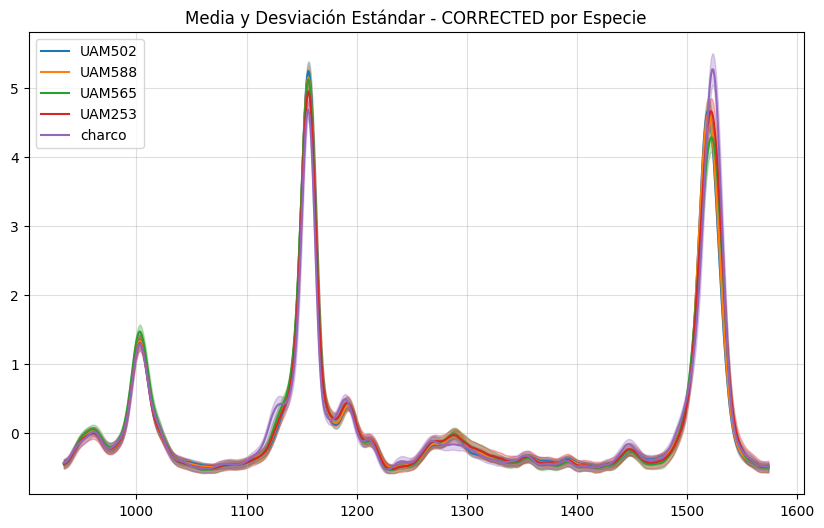

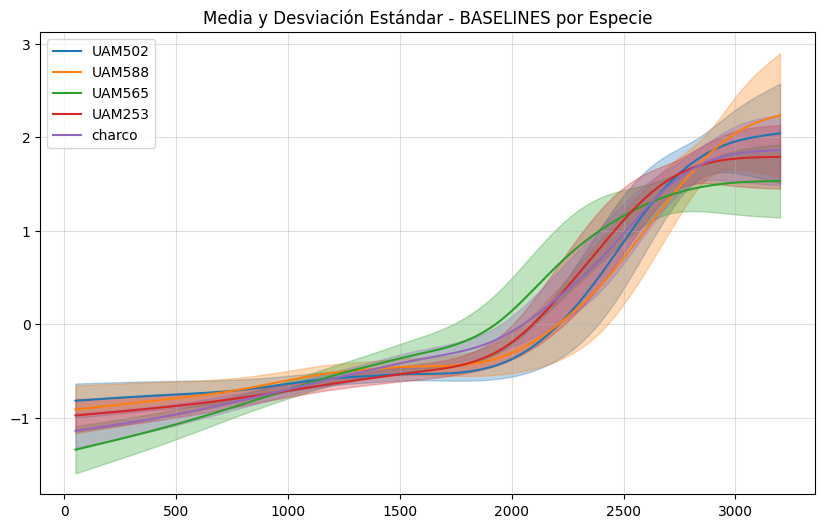

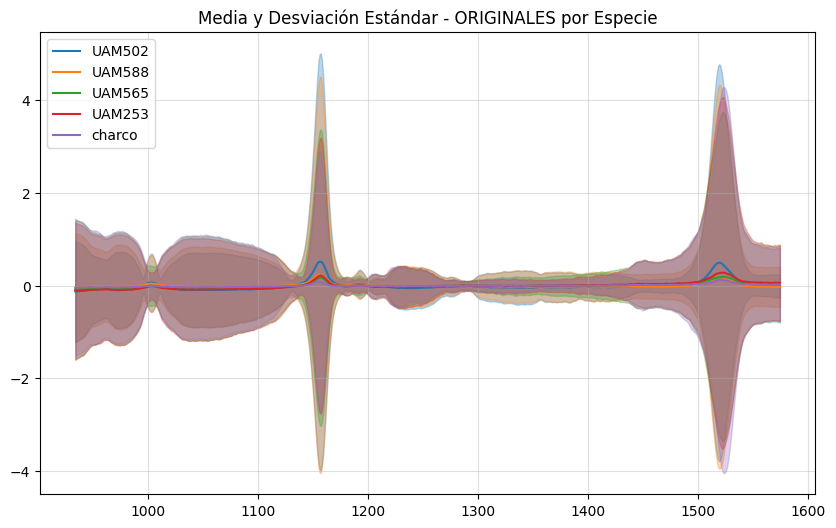

In [103]:
# Función para calcular media y desviación estándar por cada especie

def calcular_media_std(df, categorical_columns):
    df_numeric = df.drop(columns=categorical_columns)
    media = df_numeric.mean(axis=0)
    std = df_numeric.std(axis=0)
    return media, std


def graficar_media_std_por_especie(df, title, x_range, color_base):
    especies = df['especie'].unique()
    
    plt.figure(figsize=(10,6))
    for idx, especie in enumerate(especies):
        df_especie = df[df['especie'] == especie]
        media, std = calcular_media_std(df_especie, categorical_columns)
        color = f'C{idx % 10}'  # Para asegurar que los colores no se repitan
        plt.plot(x_range, media, label=especie, color=color)
        plt.fill_between(x_range, media - std, media + std, color=color, alpha=0.3)
    
    plt.legend(loc='upper left')
    plt.grid(True, alpha=0.4)
    plt.title(title)
    plt.show()


# Columnas categóricas a eliminar
categorical_columns = ['name', 'date', 't_exp', 'especie', 'medium']

# Rango de x para los gráficos
x_corr = np.arange(934, 1575, 1)  # Rango para CORRECTED y ORIGINALES
x_baselines = np.arange(50, 3200, 1)  # Rango para BASELINES

# Graficar para CORRECTED
graficar_media_std_por_especie(df_concatenado, 'Media y Desviación Estándar - CORRECTED por Especie', x_corr, 'C0')

# Graficar para BASELINES
graficar_media_std_por_especie(baselines_norm, 'Media y Desviación Estándar - BASELINES por Especie', x_baselines, 'C1')

# Graficar para ORIGINALES
graficar_media_std_por_especie(originales_norm, 'Media y Desviación Estándar - ORIGINALES por Especie', x_corr, 'C2')


In [93]:
df_concatenado.isna().any().any()

False

In [99]:
# Identificar filas duplicadas
duplicated_rows = df_concatenado.duplicated()

# Contar cuántas filas duplicadas hay
num_duplicates = duplicated_rows.sum()

num_duplicates


0

In [96]:
if num_duplicates > 0:
    unique_names = df_concatenado[duplicated_rows]['name'].unique()
    unique_names
else:
    unique_names = None

unique_names